In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
data = pd.read_csv('user_courses_review_09_2023.csv', on_bad_lines='skip')
data.head()

,course_name,lecture_name,review_rating,review_comment
0,A/B Testing in Python,How to set up the A/B test,5,If she could provide more details about the pr...
1,A/B Testing in Python,How to set up the A/B test,5,nice
2,A/B Testing in Python,How to set up the A/B test,5,excellent course
3,A/B Testing in Python,How to set up the A/B test,5,nice
4,A/B Testing in Python,Conclusion,5,It was an experiential learning process


In [6]:
# Show basic info and a preview
data.info(), data.head(), data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10842 entries, 0 to 10841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   course_name     10842 non-null  object
 1   lecture_name    10832 non-null  object
 2   review_rating   10828 non-null  object
 3   review_comment  10639 non-null  object
dtypes: object(4)
memory usage: 338.9+ KB


(None,
              course_name                lecture_name review_rating  \
 0  A/B Testing in Python  How to set up the A/B test             5   
 1  A/B Testing in Python  How to set up the A/B test             5   
 2  A/B Testing in Python  How to set up the A/B test             5   
 3  A/B Testing in Python  How to set up the A/B test             5   
 4  A/B Testing in Python                  Conclusion             5   
 
                                       review_comment  
 0  If she could provide more details about the pr...  
 1                                               nice  
 2                                   excellent course  
 3                                               nice  
 4            It was an experiential learning process  ,
                                   course_name  \
 count                                   10842   
 unique                                    119   
 top     Introduction to Data and Data Science   
 freq                       

In [14]:
# Check current data types
dtypes_before = data.dtypes

# Convert 'review_rating' to numeric (force errors to NaN)
data['review_rating'] = pd.to_numeric(data['review_rating'], errors='coerce')

# Re-check data types after conversion
dtypes_after = data.dtypes

print(dtypes_before,'\n\n',dtypes_after)


course_name        object
lecture_name       object
review_rating     float64
review_comment     object
dtype: object 

 course_name        object
lecture_name       object
review_rating     float64
review_comment     object
dtype: object


In [16]:
# Check missing values
print("\nMissing Values:\n", data.isnull().sum())

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Optionally drop rows with missing 'review_rating' or 'course_name'
df_cleaned = data.dropna(subset=['review_rating', 'course_name'])


Missing Values:
 course_name         0
lecture_name       10
review_rating      18
review_comment    203
dtype: int64

Duplicate Rows: 1453


In [19]:
# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Optional: reset index
df_cleaned.reset_index(drop=True, inplace=True)

duplicates = df_cleaned.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Confirm result
print(f"Shape after removing duplicates: {df_cleaned.shape}")





Duplicate Rows: 0
Shape after removing duplicates: (9371, 4)


/var/folders/vx/jfvnz6_s7cd9p604bj3hzbt80000gn/T/ipykernel_52109/1631243387.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_rating', data=df_cleaned, palette='Blues_r')


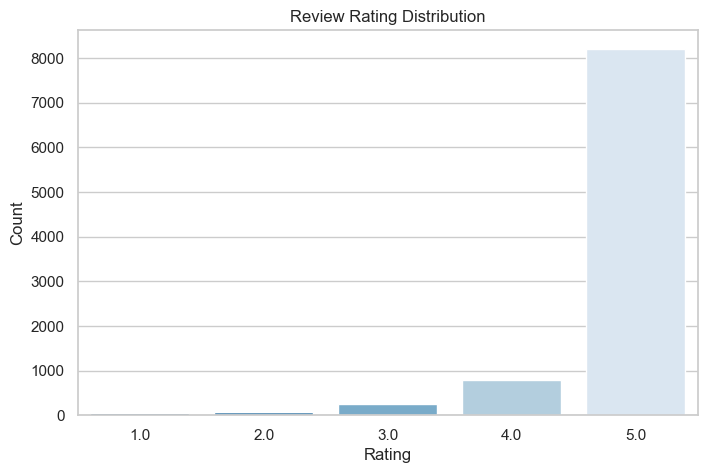


Rating Summary:
count    9371.000000
mean        4.817949
std         0.559332
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: review_rating, dtype: float64

Rating Value Counts:
5.0    8211
4.0     787
3.0     249
2.0      75
1.0      49
Name: review_rating, dtype: int64


In [21]:
# Set style
sns.set(style="whitegrid")

# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='review_rating', data=df_cleaned, palette='Blues_r')
plt.title('Review Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print basic stats
print("\nRating Summary:")
print(df_cleaned['review_rating'].describe())
print("\nRating Value Counts:")
print(df_cleaned['review_rating'].value_counts())


In [22]:
# -------------------Group by course and compute stats-------------------
course_stats = df_cleaned.groupby('course_name')['review_rating'].agg(['count', 'mean']).reset_index()

# Rename for clarity
course_stats.columns = ['course_name', 'num_reviews', 'avg_rating']

# Sort: Most reviewed
most_reviewed = course_stats.sort_values(by='num_reviews', ascending=False).head(10)
print("\n📈 Top 10 Most Reviewed Courses:")
print(most_reviewed)

# Sort: Highest average rating (with a minimum review count, e.g., 20)
top_rated = course_stats[course_stats['num_reviews'] >= 20].sort_values(by='avg_rating', ascending=False).head(10)
print("\n⭐ Top 10 Highest Rated Courses (min 20 reviews):")
print(top_rated)



📈 Top 10 Most Reviewed Courses:
                              course_name  num_reviews  avg_rating
49  Introduction to Data and Data Science         1405    4.845552
51                  Introduction to Excel          859    4.852154
45     Intro to ChatGPT and Generative AI          636    4.783019
92                             Statistics          424    4.752358
24  Data Analysis with Excel Pivot Tables          368    4.853261
28                          Data Strategy          357    4.745098
86                                    SQL          316    4.870253
54                 Introduction to Python          303    4.907591
83             Python Programmer Bootcamp          302    4.834437
53                Introduction to Jupyter          266    4.879699

⭐ Top 10 Highest Rated Courses (min 20 reviews):
                                         course_name  num_reviews  avg_rating
30                         Dates and Times in Python           31    5.000000
88                      

/var/folders/vx/jfvnz6_s7cd9p604bj3hzbt80000gn/T/ipykernel_52109/2404989141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='course_name', data=top_rated, palette='Greens_d')


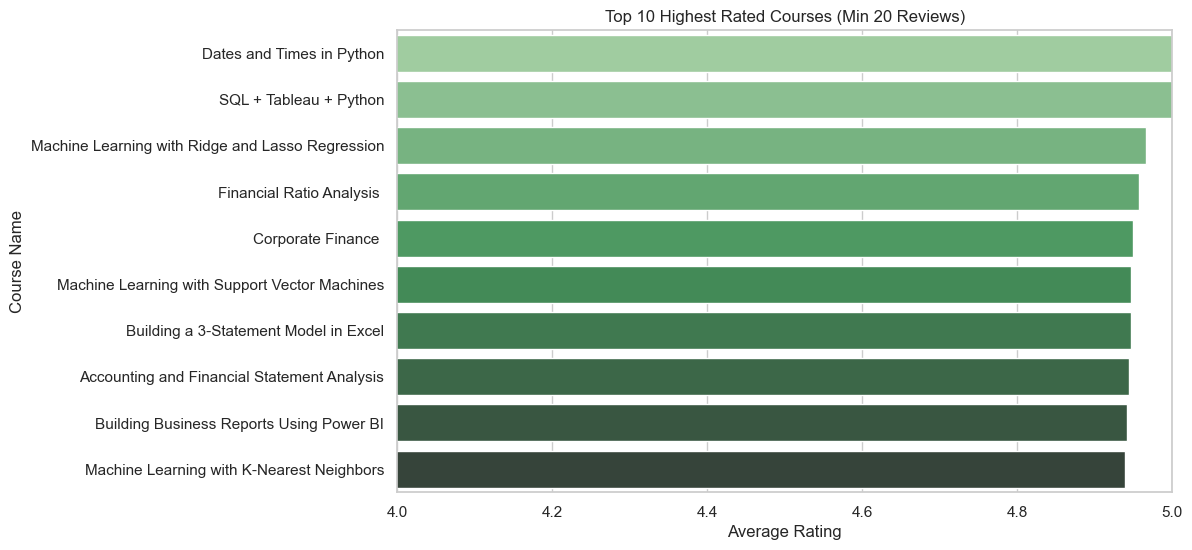

In [23]:
# -------------------Visualize Top Rated Courses-------------------
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_rating', y='course_name', data=top_rated, palette='Greens_d')
plt.title('Top 10 Highest Rated Courses (Min 20 Reviews)')
plt.xlabel('Average Rating')
plt.ylabel('Course Name')
plt.xlim(4, 5)
plt.show()


In [24]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nehasoni/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/nehasoni/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nehasoni/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nehasoni/nltk_data...


True

In [27]:
## -------------------Clean comments using nltk-------------------

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define cleaning function
def clean_and_lemmatize(text):
    # Lowercase and remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    
    # Tokenize
    words = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(cleaned)

# Apply to review_comment column (dropna first)
df_cleaned['cleaned_comment'] = df_cleaned['review_comment'].dropna().apply(clean_and_lemmatize)

# Preview result
print(df_cleaned[['review_comment', 'cleaned_comment']].head(5))


                                      review_comment  \
0  If she could provide more details about the pr...   
1                                               nice   
2                                   excellent course   
3            It was an experiential learning process   
4                                            great\n   

                                     cleaned_comment  
0  could provide detail process would great examp...  
1                                               nice  
2                                   excellent course  
3                      experiential learning process  
4                                              great  


In [28]:
## -------------------word frequency calculation-------------------
from collections import Counter

# Drop missing values (if any) in cleaned comments
cleaned_text_series = df_cleaned['cleaned_comment'].dropna()

# Split all words from all comments into a list
all_cleaned_words = ' '.join(cleaned_text_series).split()

# Count word frequencies
word_freq = Counter(all_cleaned_words)

# Show top 20 most common words
print("🔠 Top 20 Most Common Words in Cleaned Comments:")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")


🔠 Top 20 Most Common Words in Cleaned Comments:
course: 2546
good: 1521
great: 1278
excellent: 1163
data: 522
really: 512
understand: 459
easy: 458
well: 448
amazing: 420
explanation: 412
nice: 394
thanks: 331
content: 323
clear: 315
thank: 310
informative: 309
awesome: 305
learning: 298
like: 290


In [38]:
import sys
print(sys.executable)



/Users/nehasoni/opt/anaconda3/bin/python


In [42]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [44]:
# -----------------start of sentiment analysis-------------------
from textblob import TextBlob

In [45]:
# Define function to extract polarity and subjectivity
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Drop missing cleaned comments
non_null_comments = df_cleaned['cleaned_comment'].dropna()

# Apply sentiment analysis
sentiment_scores = non_null_comments.apply(analyze_sentiment)

# Split into two new columns
df_cleaned.loc[non_null_comments.index, 'polarity'] = sentiment_scores.apply(lambda x: x[0])
df_cleaned.loc[non_null_comments.index, 'subjectivity'] = sentiment_scores.apply(lambda x: x[1])



📈 Sentiment Summary:
          polarity  subjectivity
count  9275.000000   9275.000000
mean      0.478487      0.585669
std       0.347024      0.330182
min      -1.000000      0.000000
25%       0.200000      0.385714
50%       0.500000      0.600000
75%       0.716667      0.863889
max       1.000000      1.000000


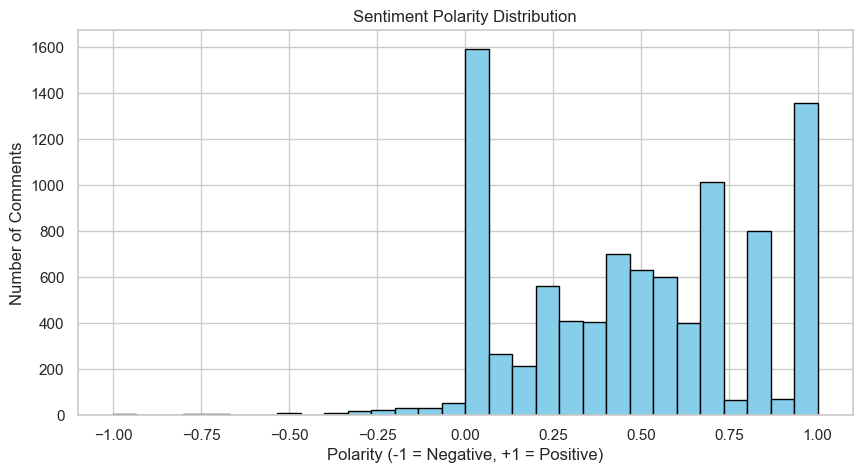

In [47]:
# Basic stats
print("\n📈 Sentiment Summary:")
print(df_cleaned[['polarity', 'subjectivity']].describe())

# Histogram of polarity
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
df_cleaned['polarity'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity (-1 = Negative, +1 = Positive)')
plt.ylabel('Number of Comments')
plt.show()


In [48]:
# --------Group by course and calculate mean polarity and subjectivity-------------
course_sentiment = df_cleaned.groupby('course_name')[['polarity', 'subjectivity']].mean().reset_index()

# Sort by most positive sentiment
top_positive_courses = course_sentiment.sort_values(by='polarity', ascending=False).head(10)

# Sort by most negative sentiment
top_negative_courses = course_sentiment.sort_values(by='polarity', ascending=True).head(10)

print("😊 Top 10 Most Positively Perceived Courses:")
print(top_positive_courses)

print("\n😠 Top 10 Most Negatively Perceived Courses:")
print(top_negative_courses)


😊 Top 10 Most Positively Perceived Courses:
                                          course_name  polarity  subjectivity
1            \nIntroduction to Data and Data Science"  1.000000      1.000000
34                       Excel for Project Management  1.000000      1.000000
71        Mastering Key Performance Indicators (KPIs)  0.741667      0.868750
50                  Introduction to Equity Securities  0.671528      0.749802
23             Data Analysis in Power BI with ChatGPT  0.660804      0.688512
76                           Persuasion and Influence  0.650000      0.825000
69                                         Management  0.643750      0.781250
14              Building a 3-Statement Model in Excel  0.634913      0.734358
16  Convolutional Neural Networks with TensorFlow ...  0.624854      0.672703
70                                 Marketing Strategy  0.624242      0.622727

😠 Top 10 Most Negatively Perceived Courses:
                                          course_name

/var/folders/vx/jfvnz6_s7cd9p604bj3hzbt80000gn/T/ipykernel_52109/1390471393.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='polarity', y='course_name', data=top_positive_courses, palette='Greens_r')


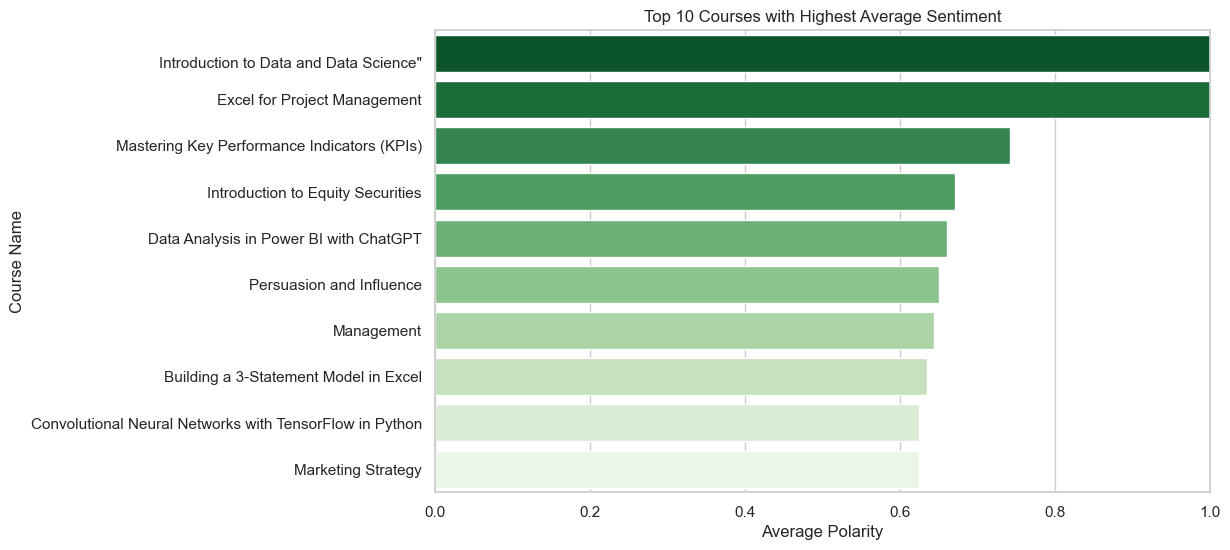

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top positive courses
plt.figure(figsize=(10, 6))
sns.barplot(x='polarity', y='course_name', data=top_positive_courses, palette='Greens_r')
plt.title('Top 10 Courses with Highest Average Sentiment')
plt.xlabel('Average Polarity')
plt.ylabel('Course Name')
plt.xlim(0, 1)
plt.show()
